MEM T380

Case Studies Group 10

Ante Sokosa  
Ziad Hatab

Final Project - Weld Defect Classification with Aritifial Neural Networks

In [1]:
# for calculating notebook runtime
import time
start_time = time.time()

In [28]:
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

# 1 &nbsp; `Data Exploration (Access, Preprocessimg, and Deriving Features`

Data exploration has been previously explained, discussed, and completed in HW2.  
We are importing this data as explored, cleaned, and prepared with subsets combined.

Standerdize instead of normalize.

In [30]:
excel_file = 'weld_defect_dataset_cleaned_prepared_and_subsets_combined.xlsx'
df = pd.read_excel(excel_file)

nums = list(df.select_dtypes(include=['float64']).columns)

standard_scaler = StandardScaler()
df[nums] = standard_scaler.fit_transform(df[nums])
df

,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc,type,type_num,type_CR,type_LF,type_LP,type_PO,type_SL
0,-0.874553,-0.786637,-0.116198,1.687500,3.592437,-0.462970,2.014749,-0.646807,-0.608549,0.112723,-0.587744,PO,3,0,0,0,1,0
1,-0.867095,-0.800094,-0.873054,1.687500,1.916513,-0.783785,-0.847640,-0.649219,-0.550744,0.643202,-0.230305,PO,3,0,0,0,1,0
2,-0.882011,-0.800094,-0.739818,2.324728,2.420339,-0.729491,1.073546,-0.650634,-0.513391,0.576477,-0.225458,PO,3,0,0,0,1,0
3,-0.770168,-0.800094,-1.330129,0.540485,-0.903687,0.469655,1.223842,-0.597296,-0.716502,-0.141997,-0.921506,PO,3,0,0,0,1,0
4,-0.822358,-0.800094,-0.913765,0.625398,-1.020156,2.505449,0.173118,-0.620766,-0.824734,0.211772,-1.363982,PO,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0.527210,2.890215,1.974872,-1.089548,2.270158,-0.870020,-0.899740,0.061944,3.128958,-0.064287,0.250808,CR,0,1,0,0,0,0
215,-0.143847,1.998389,1.005208,-1.268292,1.245591,-0.196870,-0.352191,-0.590920,0.263546,1.189902,0.347742,CR,0,1,0,0,0,0
216,0.750896,2.488716,0.509273,-1.074733,0.758081,-0.854702,-0.771054,0.713970,3.128171,-0.574069,0.534778,CR,0,1,0,0,0,0
217,0.758354,1.443158,0.194687,-0.935655,0.645220,-0.780371,-0.740219,0.449058,2.452631,-0.154380,0.593998,CR,0,1,0,0,0,0


For Reference: 

`Defect Features:`

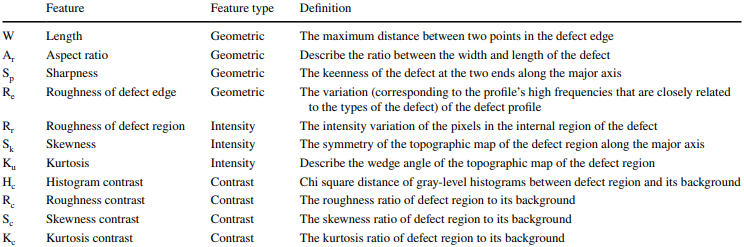

`Defect Types:`  
- `CR` = crack
- `LF` = lack of fusion
- `LP` = lack of penetration
- `PO` = porosity
- `SL` = slag inclusion

Useing `.info()` and `.describe()` for data confirmation and reference:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   w         219 non-null    float64
 1   ar        219 non-null    float64
 2   sp        219 non-null    float64
 3   re        219 non-null    float64
 4   rr        219 non-null    float64
 5   sk        219 non-null    float64
 6   ku        219 non-null    float64
 7   hc        219 non-null    float64
 8   rc        219 non-null    float64
 9   sc        219 non-null    float64
 10  kc        219 non-null    float64
 11  type      219 non-null    object 
 12  type_num  219 non-null    int64  
 13  type_CR   219 non-null    int64  
 14  type_LF   219 non-null    int64  
 15  type_LP   219 non-null    int64  
 16  type_PO   219 non-null    int64  
 17  type_SL   219 non-null    int64  
dtypes: float64(11), int64(6), object(1)
memory usage: 30.9+ KB


In [32]:
df[nums].describe()


,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
count,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,-8.111218e-18,-3.244487e-17,1.662800e-16,-9.733462e-17,-6.083414e-18,-7.502877e-17,1.022014e-15,3.244487e-17,-4.461170e-17,9.125121e-17,-4.866731e-17
std,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00
min,-9.118320e-01,-8.000944e-01,-2.658791e+00,-1.475707e+00,-1.198802e+00,-1.012763e+00,-2.886221e+00,-6.694647e-01,-1.228245e+00,-1.672119e+00,-2.987224e+00
25%,-7.254280e-01,-7.653339e-01,-8.526988e-01,-9.823347e-01,-7.802472e-01,-6.275409e-01,-5.615597e-01,-5.772531e-01,-6.256668e-01,-6.639940e-01,-7.075824e-01
50%,-5.091975e-01,-5.683864e-01,-5.883228e-02,6.654728e-02,-1.722487e-01,-3.363570e-01,-2.232333e-01,-4.229268e-01,-3.357616e-01,-1.781106e-01,2.536041e-02
75%,5.272102e-01,6.058740e-01,1.049620e+00,7.977667e-01,4.401597e-01,1.959837e-01,4.299905e-01,1.516094e-01,2.171876e-01,5.471275e-01,6.215435e-01
max,4.285127e+00,3.236178e+00,1.974872e+00,2.324728e+00,3.618412e+00,5.087585e+00,3.966286e+00,6.907185e+00,4.537491e+00,5.315733e+00,3.629988e+00


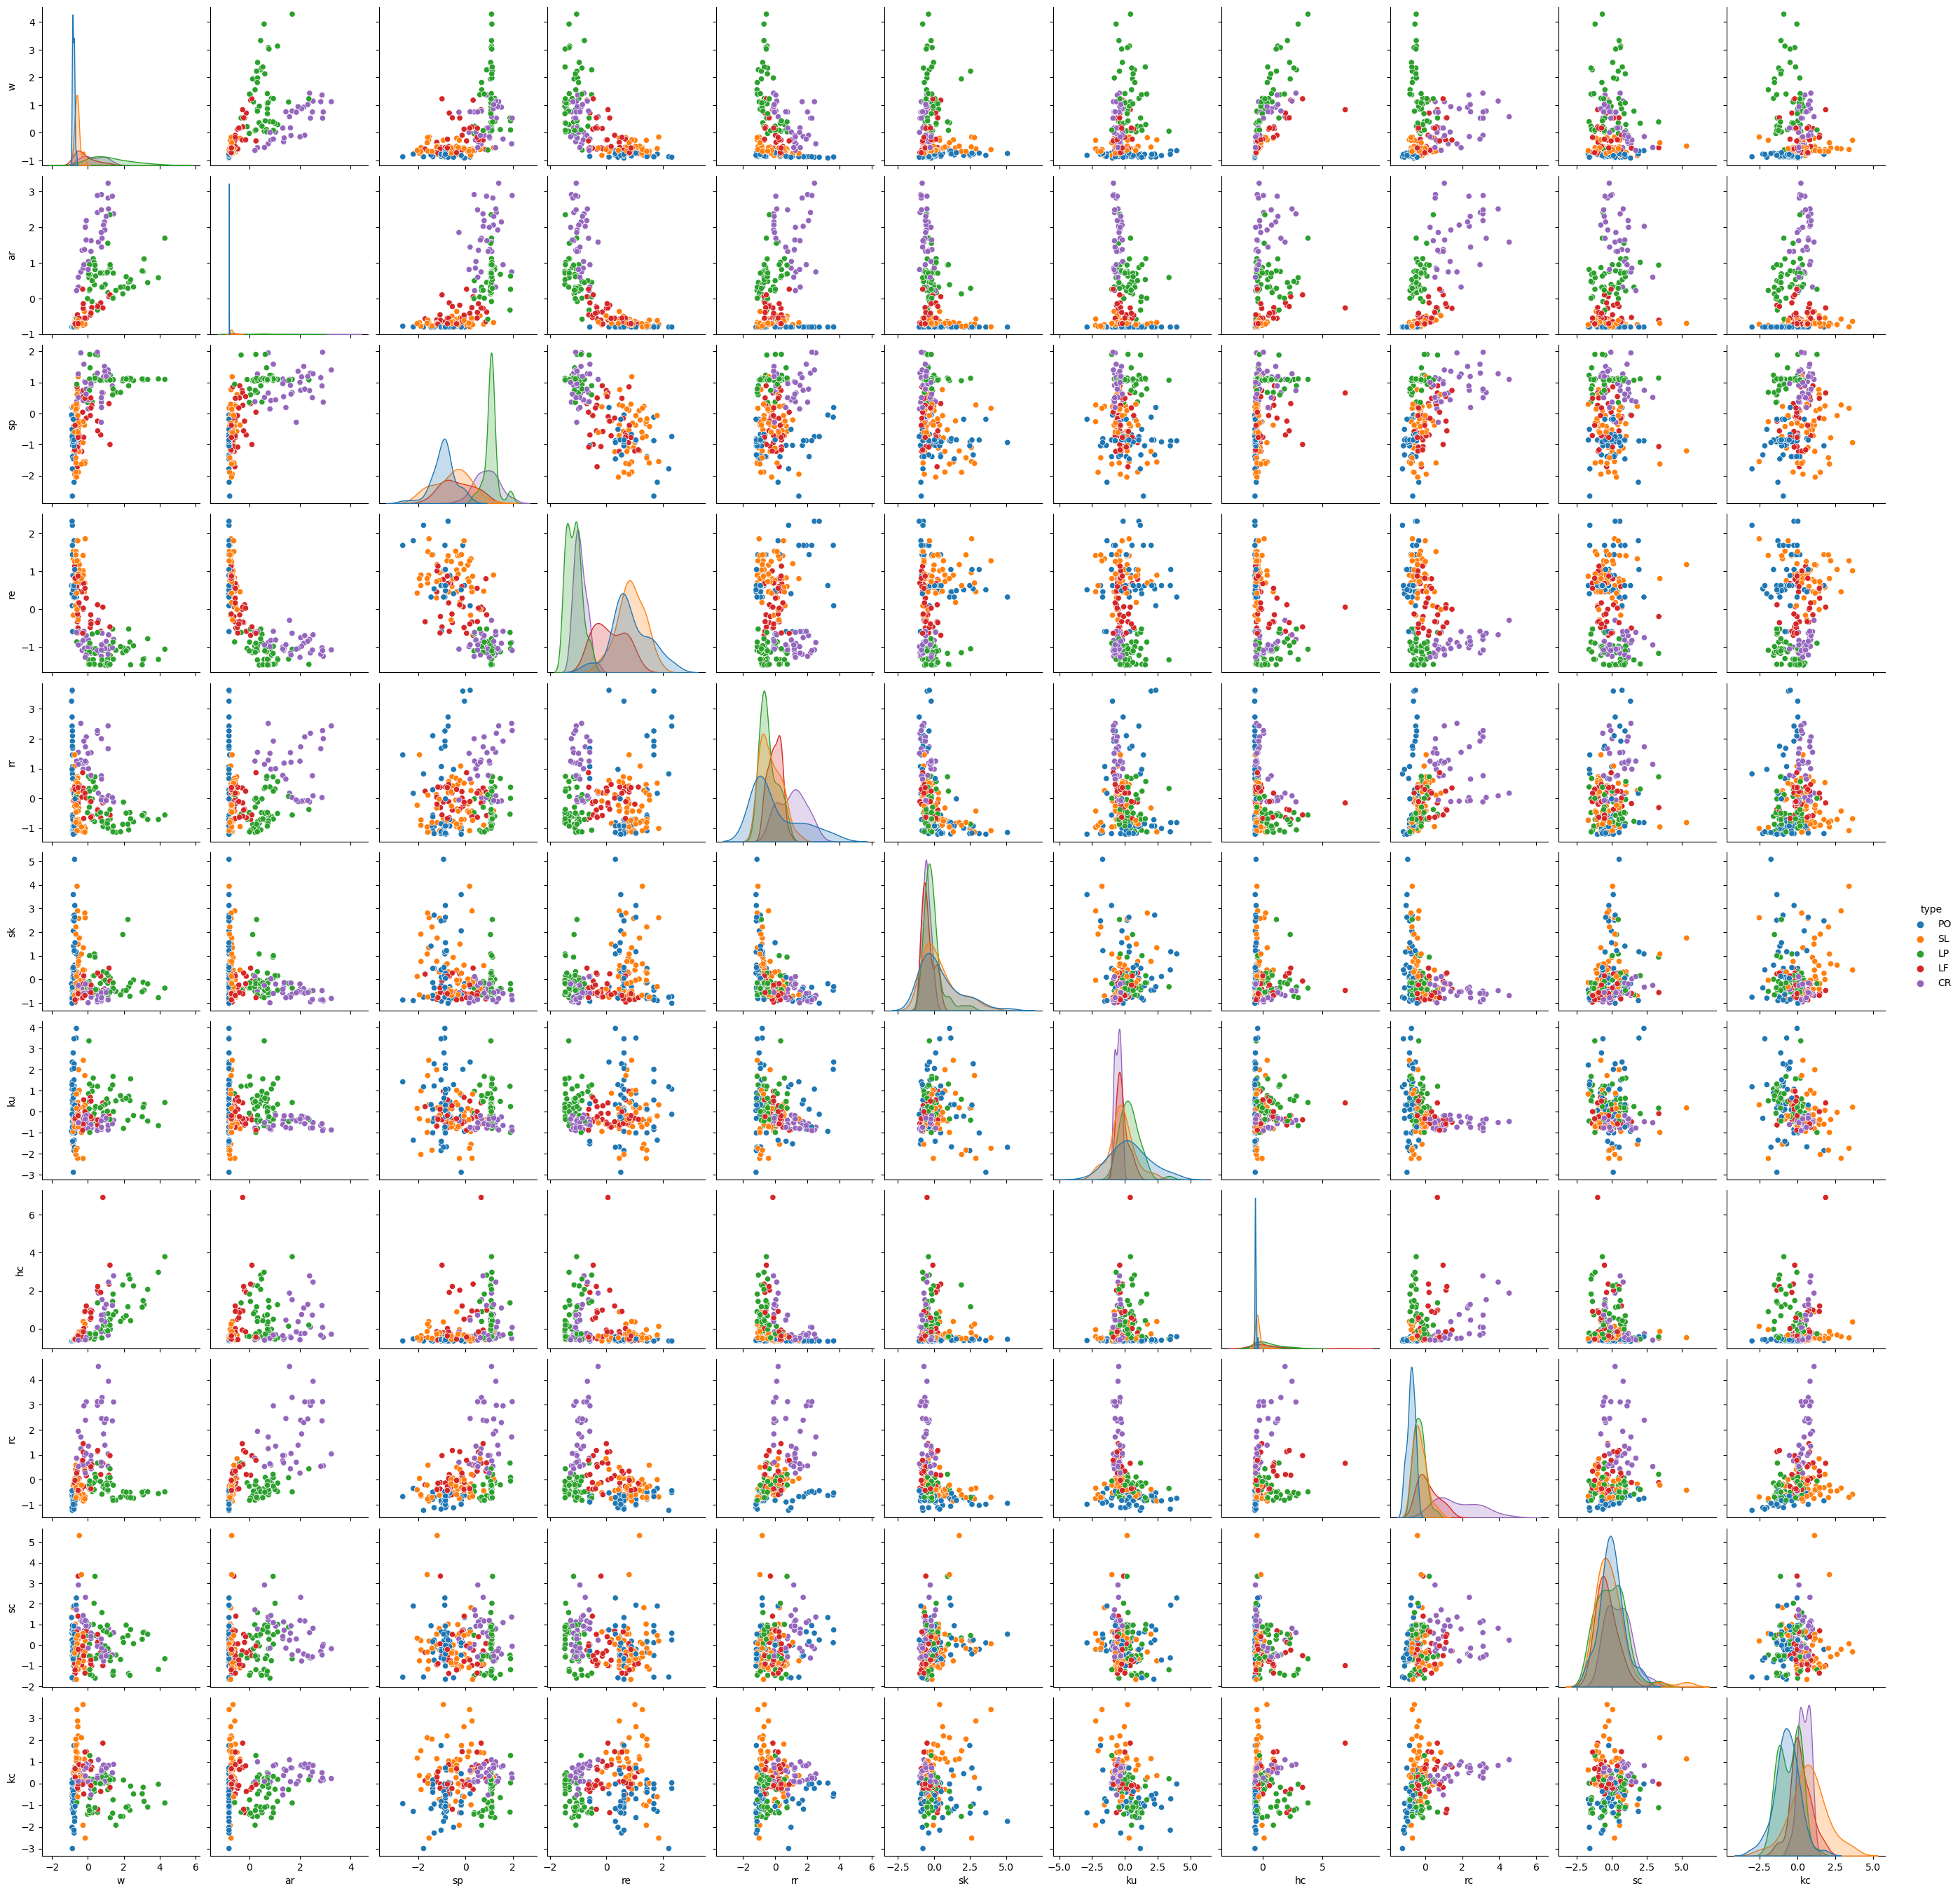

In [33]:
sns.pairplot(df, vars=nums, hue='type', diag_kind='kde')

<Axes: >

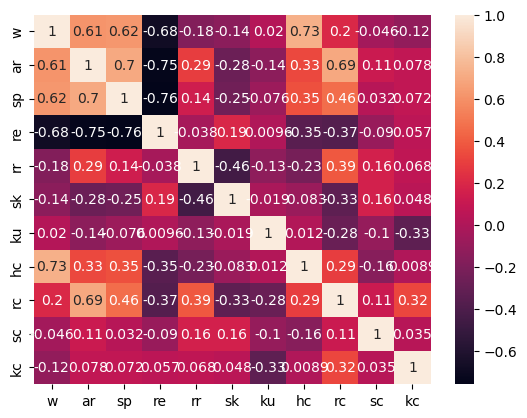

In [34]:
sns.heatmap(df[nums].corr(), annot=True)

# 2 &nbsp; `Train`

We will begin by splitting our data into training and testing sets, using a 20% test size:

In [35]:
X = df.select_dtypes(include=['float64']).values
Y = df.select_dtypes(include=['int64']).drop(['type_num'], axis=1).values

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape} Type: {type(X_train)}')
print(f'X_test  shape: {X_test.shape}  Type: {type(X_test)}')
print(f'y_train shape: {Y_train.shape}  Type: {type(Y_train)}')
print(f'y_test  shape: {Y_test.shape}   Type: {type(Y_test)}')

n_features = X.shape[1]
n_classes = Y.shape[1]
print('number of features: ', n_features)
print('number of classes : ', n_classes)

X_train shape: (175, 11) Type: <class 'numpy.ndarray'>
X_test  shape: (44, 11)  Type: <class 'numpy.ndarray'>
y_train shape: (175, 5)  Type: <class 'numpy.ndarray'>
y_test  shape: (44, 5)   Type: <class 'numpy.ndarray'>
number of features:  11
number of classes :  5


Construct basic artificial neural network (ANN) model with Keras:

explain why relu and sigmoid - sigmoid needed for outet - relu needed earlier due to vanishing gradient problem it does best on (as in reaserch paper)

We will create a functioin of a basic ANN model and then created differenent instances basese on different params, skips, etc.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 dense_194 (Dense)              (None, 5)            60          ['input_9[0][0]']                
                                                                                                  
 dense_195 (Dense)              (None, 5)            30          ['dense_194[0][0]']              
                                                                                                  
 dense_196 (Dense)              (None, 5)            30          ['dense_195[0][0]']              
                                                                                              

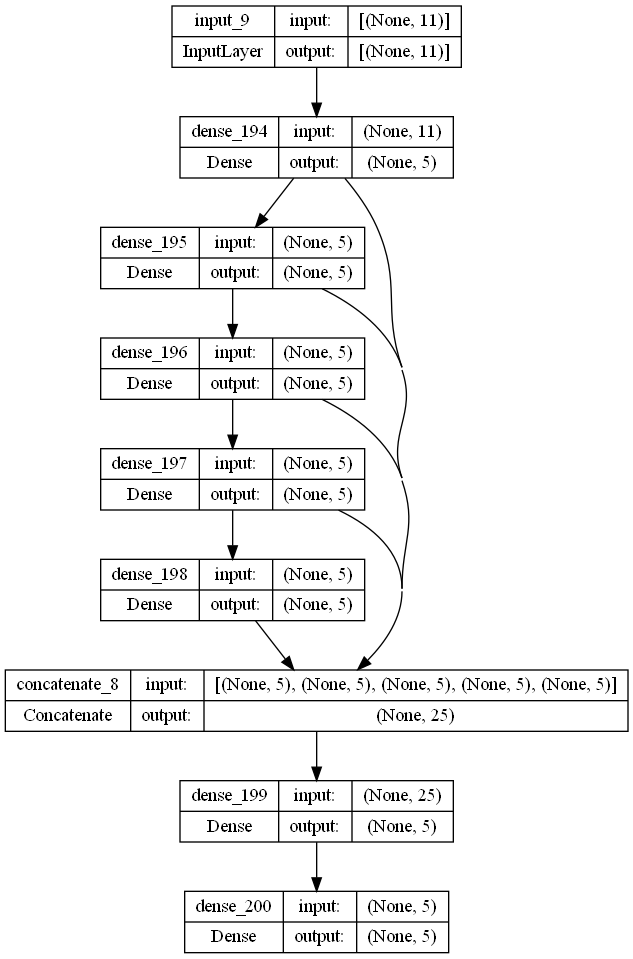

In [112]:
# def create_keras_model(input_dim, output_dim, nodes=5, n_hidden=1, name='model'):
#     '''
#     How to call:
#     myModel = create_keras_model(n_features, n_classes, nodes=5, n=1, name='model')
#     '''
#     # Create model
#     model = Sequential(name=name)
#     model.add(Dense(units=nodes,
#                     input_dim=input_dim,
#                     activation='relu',
#                     kernel_initializer='random_normal'
#                    )
#              )
#     # add HIDDEN layers to the network:
#     for i in range(n_hidden):
#         model.add(Dense(units=nodes,
#                         activation='relu',
#                         kernel_initializer='random_normal'
#                        )
#                  )
#     # OUTPUT layer:
#     model.add(Dense(output_dim, 
#                     activation='softmax', #  sigmoid
#                    )
#              )
    
#     model.compile(optimizer='adam', #  sgd
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy']
#                  )
    
#     return model

from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

def create_keras_model(input_dim, output_dim, nodes=5, n_hidden=4, name='model'):
    '''
    How to call:
    myModel = create_keras_model(n_features, n_classes, nodes=5, n=4, name='model')
    '''

    # define input layer
    inputs = Input(shape=(input_dim,))

    # list to hold all the hidden layers
    hidden_layers = []

    # create the hidden layers
    for i in range(n_hidden):
        if i == 0:
            # if it's the first hidden layer, connect it to the inputs
            hidden_layers.append(Dense(units=nodes, activation='relu', kernel_initializer='random_normal')(inputs))
        else:
            # otherwise, connect it to the previous hidden layer
            hidden_layers.append(Dense(units=nodes, activation='relu', kernel_initializer='random_normal')(hidden_layers[-1]))
            
    # create the final hidden layer, connected to all previous hidden layers
    final_hidden = Dense(units=nodes, activation='relu', kernel_initializer='random_normal')(concatenate(hidden_layers))

    # create output layer connected to the final hidden layer
    outputs = Dense(output_dim, activation='softmax')(final_hidden)

    # create model
    model = Model(inputs=inputs, outputs=outputs, name=name)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


model0 = create_keras_model(n_features, n_classes, nodes=5, n_hidden=5, name='model')
model0.summary()
plot_model(model0, show_shapes=True)

In [ ]:
model0firstfit = model0.fit(X_train, Y_train, batch_size=32, epochs=400, verbose=0, validation_data=(X_test, Y_test))

In [105]:
# model0.metrics_names


# score = model0.evaluate(X_test, Y_test, verbose=1)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])


# fig, (ax1, ax2) = plt.subplots(2, figsize=(9, 8))

# val_accurady = model0firstfit.history['val_accuracy']
# val_loss = model0firstfit.history['val_loss']
# ax1.plot(val_accurady)
# ax2.plot(val_loss)
    
# ax1.set_ylabel('Validation Accuracy')
# ax2.set_ylabel('Validation Loss')
# ax2.set_xlabel('epochs')

(0.0, 1.6857171535491944)

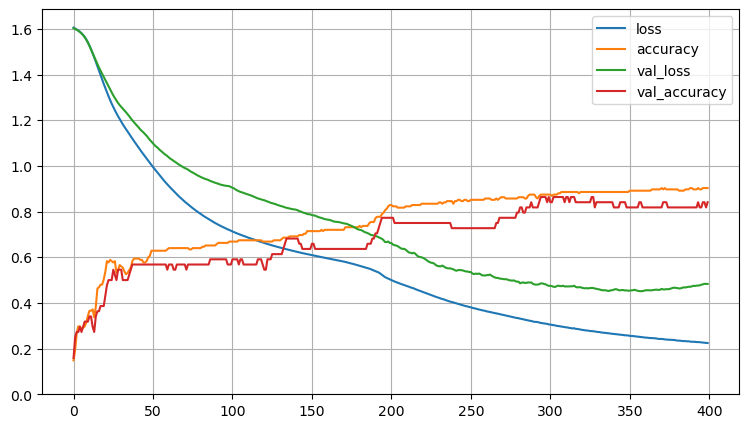

In [106]:
maxes = []
for met in model0firstfit.history.keys():
    maxes.append(max(model0firstfit.history[met]))
mmax = max(maxes)

pd.DataFrame(model0firstfit.history).plot(figsize=(9, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.05*mmax) # set the vertical range to [0-1] plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_keras_model(input_dim=11, output_dim=5, nodes=5, n_hidden=4):
    '''
    How to call:
    myModel = create_keras_model(n_features, n_classes, nodes=5, n=4, name='model')
    '''

    # define input layer
    inputs = Input(shape=(input_dim,))

    # list to hold all the hidden layers
    hidden_layers = []

    # create the hidden layers
    for i in range(n_hidden):
        if i == 0:
            # if it's the first hidden layer, connect it to the inputs
            hidden_layers.append(Dense(units=nodes, activation='relu', kernel_initializer='random_normal')(inputs))
        else:
            # otherwise, connect it to the previous hidden layer
            hidden_layers.append(Dense(units=nodes, activation='relu', kernel_initializer='random_normal')(hidden_layers[-1]))
            
    # create the final hidden layer, connected to all previous hidden layers
    final_hidden = Dense(units=nodes, activation='relu', kernel_initializer='random_normal')(concatenate(hidden_layers))

    # create output layer connected to the final hidden layer
    outputs = Dense(output_dim, activation='softmax')(final_hidden)

    # create model
    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Wrap Keras model with KerasClassifier
model = KerasClassifier(build_fn=create_keras_model, verbose=0)

# define the grid search parameters
param_grid = {
    'nodes': list(range(1, 11)),
    'batch_size': list(range(1, 50)),
    'epochs': list(range(1,200))
}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [8]:
end_time = time.time()
print(f'Total runtime of this notebook is {(end_time-start_time)/60:0.2f} minutes.')

Total runtime of this notebook is 2.24 minutes.
